In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


In [15]:
# 1. 입력 기능
def input_relation_matrix():
    print("5×5 관계행렬을 입력하세요 (각 행을 공백으로 구분)")
    matrix = []
    for i in range(5):
        row = list(map(int, input(f"{i+1}행: ").split()))
        if len(row) != 5:
            raise ValueError("각 행은 정확히 5개의 값이어야 합니다.")
        matrix.append(row)
    return np.array(matrix)

In [16]:
# 2. 동치 관계 판별 기능
def is_reflexive(R):
    return all(R[i][i] == 1 for i in range(5))

def is_symmetric(R):
    return np.array_equal(R, R.T)

def is_transitive(R):
    n = 5
    for i in range(n):
        for j in range(n):
            if R[i][j]:
                for k in range(n):
                    if R[j][k] and not R[i][k]:
                        return False
    return True

# 관계의 모든 성질 판별
def check_equivalence(R):
    re = is_reflexive(R)
    sy = is_symmetric(R)
    tr = is_transitive(R)

    print("\n[관계의 성질 판별 결과]")
    print(f"반사적: {re}")
    print(f"대칭적: {sy}")
    print(f"추이적: {tr}")

    if re and sy and tr:
        print("➡ 이 관계는 동치 관계입니다.")
        return True
    else:
        print("➡ 이 관계는 동치 관계가 아닙니다.")
        return False

In [17]:
# 3. 동치류 출력 기능
def equivalence_classes(R):
    classes = []
    used = set()
    A = [1, 2, 3, 4, 5]

    for i in range(5):
        if A[i] in used:
            continue
        eq_class = []
        for j in range(5):
            if R[i][j] == 1:
                eq_class.append(A[j])
                used.add(A[j])
        classes.append(eq_class)

    return classes

def print_classes(classes):
    print("\n[동치류]")
    for c in classes:
        print(f"{c}")


In [18]:
# 4. 폐포 함수
def reflexive_closure(R):
    R2 = R.copy()
    for i in range(5):
        R2[i][i] = 1
    return R2

def symmetric_closure(R):
    return np.maximum(R, R.T)

def transitive_closure(R):
    R2 = R.copy()
    n = 5
    for k in range(n):
        for i in range(n):
            for j in range(n):
                R2[i][j] = R2[i][j] or (R2[i][k] and R2[k][j])
    return R2

In [19]:
# 5. 그래프 출력 (창의적 기능 1)
def show_graph(R, title="Relation Graph"):
    import networkx as nx
    G = nx.DiGraph()

    nodes = [1,2,3,4,5]
    G.add_nodes_from(nodes)

    for i in range(5):
        for j in range(5):
            if R[i][j] == 1:
                G.add_edge(i+1, j+1)

    plt.figure(figsize=(5,5))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=800, arrows=True)
    plt.title(title)
    plt.show()


In [20]:
# 6. 애니메이션 (창의적 추가 기능 2)
def animate_closures(R):
    steps = [
        ("Original Relation", R),
        ("Reflexive Closure", reflexive_closure(R)),
        ("Symmetric Closure", symmetric_closure(R)),
        ("Transitive Closure", transitive_closure(R)),
    ]

    for (name, mat) in steps:
        clear_output(wait=True)
        plt.figure(figsize=(4,4))
        plt.imshow(mat, cmap="Blues", vmin=0, vmax=1)
        plt.title(name)
        plt.colorbar()
        plt.show()
        time.sleep(3.0)


In [21]:
# 메인 로직 (구성조건 충족 버전)

# (1) 관계 행렬 입력
R = input_relation_matrix()

print("\n입력된 관계행렬:")
print(R)

# (2) 동치 관계 판별
is_equiv = check_equivalence(R)

# (3) 동치 관계이면 → 동치류 출력
if is_equiv:
    print("\n[동치 관계입니다.]")
    classes = equivalence_classes(R)
    print_classes(classes)

# (4) 동치 관계가 아닐 경우 → 폐포 출력
else:
    print("\n[동치 관계가 아닙니다 → 폐포 생성 시작]")

    # 반사 폐포
    print("\n[반사 폐포]")
    R_ref = reflexive_closure(R)
    print("변환 후:")
    print(R_ref)

    # 대칭 폐포
    print("\n[대칭 폐포]")
    R_sym = symmetric_closure(R)
    print("변환 후:")
    print(R_sym)

    # 추이 폐포
    print("\n[추이 폐포]")
    R_trans = transitive_closure(R)
    print("변환 후:")
    print(R_trans)

    # 최종 동치 관계 생성
    R_final = transitive_closure(symmetric_closure(reflexive_closure(R)))

    print("\n[최종 폐포 적용 후 관계]:")
    print(R_final)

    # 최종 동치류 출력
    if check_equivalence(R_final):
        print("\n[최종적으로 동치 관계입니다.]")
        classes = equivalence_classes(R_final)
        print_classes(classes)
    else:
        print("\n[여전히 동치 관계가 아닙니다.]")

5×5 관계행렬을 입력하세요 (각 행을 공백으로 구분)
1행: 1 1 0 0 0
2행: 1 1 0 0 0
3행: 1 1 0 0 0
4행: 0 0 1 1 1
5행: 0 0 1 1 1

입력된 관계행렬:
[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 1 1]
 [0 0 1 1 1]]

[관계의 성질 판별 결과]
반사적: False
대칭적: False
추이적: False
➡ 이 관계는 동치 관계가 아닙니다.

[동치 관계가 아닙니다 → 폐포 생성 시작]

[반사 폐포]
변환 후:
[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 0 1 1 1]
 [0 0 1 1 1]]

[대칭 폐포]
변환 후:
[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]]

[추이 폐포]
변환 후:
[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]]

[최종 폐포 적용 후 관계]:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

[관계의 성질 판별 결과]
반사적: True
대칭적: True
추이적: True
➡ 이 관계는 동치 관계입니다.

[최종적으로 동치 관계입니다.]

[동치류]
[1, 2, 3, 4, 5]


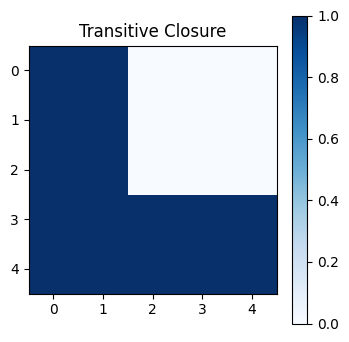

In [24]:
# 추가 기능: 그래프 & 애니메이션

def run_extra_features(R):
    print("\n[추가 기능 실행: 그래프 + 애니메이션]")

    # 원본 그래프
    show_graph(R, "Original Relation Graph")

    # 폐포 과정 애니메이션
    animate_closures(R)

run_extra_features(R)